In [2]:
#---Importando
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#---Upload Opcional (temporário)
# from google.colab import file
# arq = file.upload()

In [4]:
#---Lendo
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/sheets/AdventureWorks.xlsx")

#Caso importado temporariamente
#df = pd.read_excel("AdventureWorks.xlsx")

In [6]:
#---Verificando valores nulos
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

Mostrando Exemplos

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
359,2009-03-28,2009-04-10,307,1202,19119,200903284CS709,330.66,998.0,15,2994.00,11976.00,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey
400,2009-02-13,2009-02-19,306,1178,19062,200902134CS737,330.66,998.0,22,1536.92,20419.08,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White
598,2009-06-26,2009-07-07,307,1155,19127,200906264CS717,324.69,980.0,8,784.00,7056.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
404,2008-03-11,2008-03-24,306,1178,19049,200803114CS555,330.66,998.0,12,838.32,11137.68,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White


---

In [ ]:
#Tamanho do df (linhas,colunas)
df.shape

(904, 16)

In [ ]:
#Tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

# Perguntas

Qual a receita total?

In [ ]:
df["Valor Venda"].sum()

5984606.1426

Qual o custo total?

In [7]:
df["Custo"] = df['Custo Unitário'].mul(df['Quantidade'])

In [ ]:
#f'{df["Custo"].sum():,.2f}' #(separador de , e 2 casas decimais) Sai como "string"
round(df["Custo"].sum(), 2)

2486783.05

Qual o lucro total?

In [8]:
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [ ]:
round(df['Lucro'].sum(), 2)

3497823.09

Dias de envio de cada produto.

In [9]:
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']

Qual a média do tempo de envio para cada marca?

In [10]:
#Transformando dias em int
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [ ]:
df['Tempo Envio'].dtype

dtype('int64')

In [ ]:
round(df.groupby('Marca')['Tempo Envio'].mean(), 1)

Marca
Adventure Works    8.7
Contoso            8.5
Fabrikam           8.5
Name: Tempo Envio, dtype: float64

Qual o lucro por ano e marca?

In [ ]:
df.sample(3)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
107,2008-07-31,2008-08-07,307,1155,19103,200807314CS628,324.69,980.0,6,0.0,5880.0,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,3931.86,7
223,2009-07-11,2009-07-24,307,1203,19129,200907114CS719,324.69,980.0,8,0.0,7840.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,2597.52,5242.48,13
366,2008-04-24,2008-05-05,307,1203,19097,200804244CS558,324.69,980.0,10,1960.0,7840.0,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,3246.90,4593.10,11


In [ ]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [11]:
#---Mudando formatacao de float
pd.options.display.float_format = '{:20,.2f}'.format

Salvando esses dados em um novo DataFrame

In [ ]:
vendas_ano_marca = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
vendas_ano_marca

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


---

Qual o total de produtos vendidos?

In [ ]:
produtos_vendidos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending = False)
produtos_vendidos

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

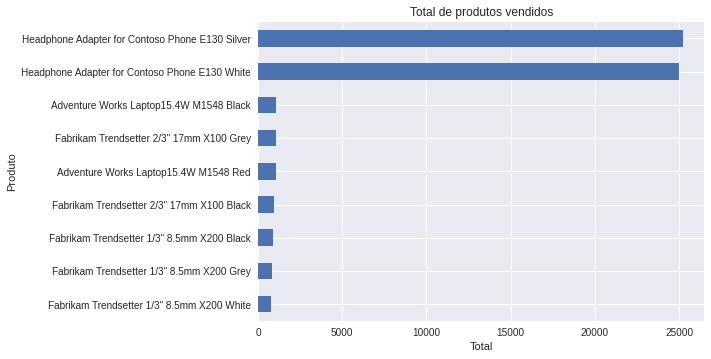

In [ ]:
#Em gráfico
produtos_vendidos.sort_values(ascending = True).plot.barh(title = 'Total de produtos vendidos')
plt.xlabel('Total')
plt.ylabel('Produto')

---

Qual o lucro por ano?

In [ ]:
df.groupby(df["Data Venda"].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

Text(0, 0.5, 'Lucro')

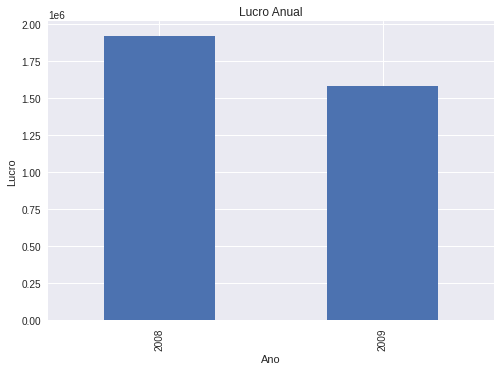

In [ ]:
df.groupby(df["Data Venda"].dt.year)['Lucro'].sum().plot.bar(title = 'Lucro Anual')
plt.xlabel('Ano')
plt.ylabel('Lucro')

---

Qual o lucros x mês no ano de 2009?

In [ ]:
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.head(3)

In [ ]:
df_2009.groupby(df['Data Venda'].dt.month)['Lucro'].sum()

Data Venda
1              130,719.04
2              179,228.92
3              147,538.25
4               66,354.39
5               90,540.00
6              200,310.41
7              227,134.51
8               46,756.42
9               83,952.62
10             130,678.05
11             132,202.23
12             142,330.53
Name: Lucro, dtype: float64

Text(0, 0.5, 'Lucro')

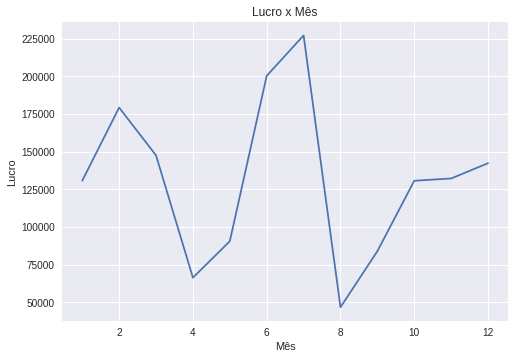

In [ ]:
df_2009.groupby(df['Data Venda'].dt.month)['Lucro'].sum().plot(title = 'Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro')

---

Qual o lucro por marca no ano de 2009?

In [ ]:
df_2009.groupby('Marca')['Lucro'].sum()

Marca
Adventure Works             405,395.08
Contoso                     138,258.95
Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

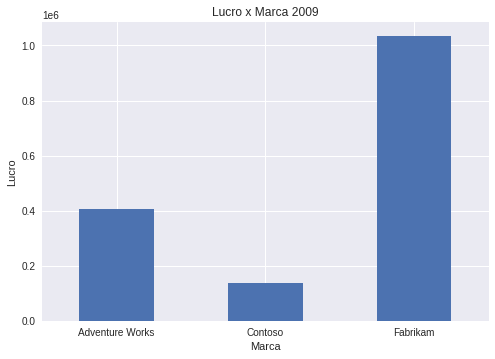

In [ ]:
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title = 'Lucro x Marca 2009')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation = 'horizontal')

---

Qual o lucro por classe no ano de 2009?

In [ ]:
df_2009.groupby(['Classe'])['Lucro'].sum().sort_values(ascending= False)

Classe
Regular           1,439,486.43
Economy             138,258.95
Name: Lucro, dtype: float64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

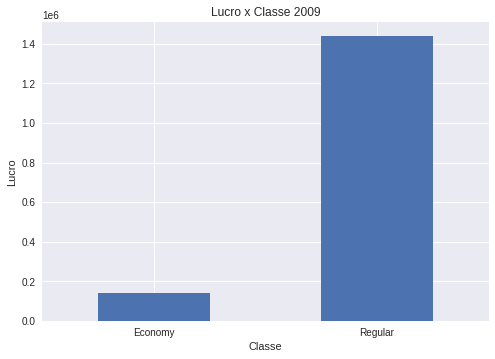

In [ ]:
df_2009.groupby(['Classe'])['Lucro'].sum().plot.bar(title = 'Lucro x Classe 2009')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation = 'horizontal')

---

# Analise estatistica - Tempo de Envio

In [12]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

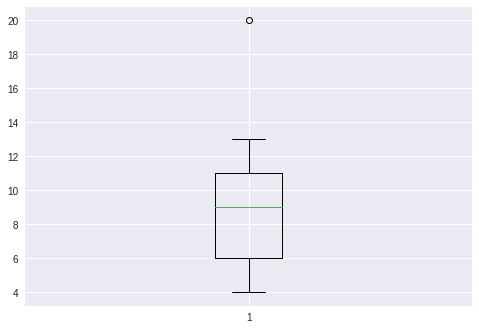

In [14]:
#---Grafico Boxplot
plt.boxplot(df['Tempo Envio']);

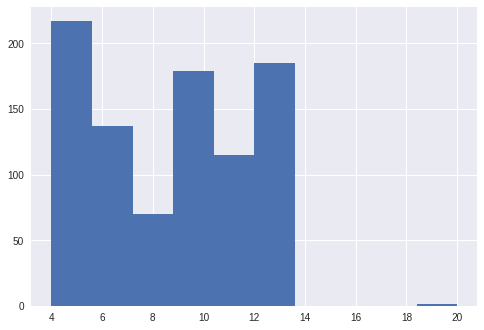

In [15]:
#---Histograma
plt.hist(df['Tempo Envio']);

In [16]:
df['Tempo Envio'].min()

4

In [17]:
df['Tempo Envio'].max()

20

In [18]:
# Verificando o Outlayer(valor discrepante)
df[df['Tempo Envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [20]:
df.to_excel("AdventureWorks_analised.xlsx", index = False)